# Data Loading and Preprocessing
Load the three CSV files (BTC, Gold, SP500), handle missing values, align dates, and create a unified dataset.

In [16]:
import pandas as pd

# Load the CSV files
btc_data = pd.read_csv('../CSV/df_btc.csv')
gold_data = pd.read_csv('../CSV/df_gold.csv')
sp500_data = pd.read_csv('../CSV/df_sp500.csv')

# Display the first few rows of each dataframe to understand their structure
print(btc_data.head())
print(gold_data.head())
print(sp500_data.head())

# Convert the date columns to datetime format
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

# Handle missing values by forward filling
btc_data.fillna(method='ffill', inplace=True)
gold_data.fillna(method='ffill', inplace=True)
sp500_data.fillna(method='ffill', inplace=True)

# Merge the dataframes on the Date column
merged_df = pd.merge(btc_data, gold_data, on='Date', suffixes=('_btc', '_gold'))
merged_df = pd.merge(merged_df, sp500_data, on='Date')

# Display the first few rows of the merged dataframe
print(merged_df.head())

# Save the merged dataframe to a new CSV file for future use
merged_df.to_csv('../CSV/merged_data.csv', index=False)

         Date         Close          High           Low          Open  \
0  2020-02-12  10326.054688  10393.611328  10202.387695  10202.387695   
1  2020-02-13  10214.379883  10457.626953  10116.161133  10323.960938   
2  2020-02-14  10312.116211  10321.996094  10125.534180  10211.550781   
3  2020-02-15   9889.424805  10341.555664   9874.427734  10313.856445   
4  2020-02-16   9934.433594  10053.968750   9722.386719   9889.179688   

        Volume  
0  43444303830  
1  49356071373  
2  43338264162  
3  43865054831  
4  43374780305  
         Date        Close         High          Low         Open  Volume
0  2020-02-12  1567.400024  1568.699951  1561.000000  1565.199951      36
1  2020-02-13  1575.099976  1575.099976  1570.199951  1570.199951      74
2  2020-02-14  1582.699951  1582.699951  1574.800049  1575.800049      68
3  2020-02-18  1600.000000  1604.300049  1579.800049  1579.800049     310
4  2020-02-19  1607.500000  1610.500000  1599.699951  1600.599976     542
         Date  

C:\Users\Jules\AppData\Local\Temp\ipykernel_9336\2235096279.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  btc_data.fillna(method='ffill', inplace=True)
C:\Users\Jules\AppData\Local\Temp\ipykernel_9336\2235096279.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gold_data.fillna(method='ffill', inplace=True)
C:\Users\Jules\AppData\Local\Temp\ipykernel_9336\2235096279.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sp500_data.fillna(method='ffill', inplace=True)


# Data Visualization
Create time series plots of all three assets, correlation matrix, and statistical analysis of the relationships between assets.

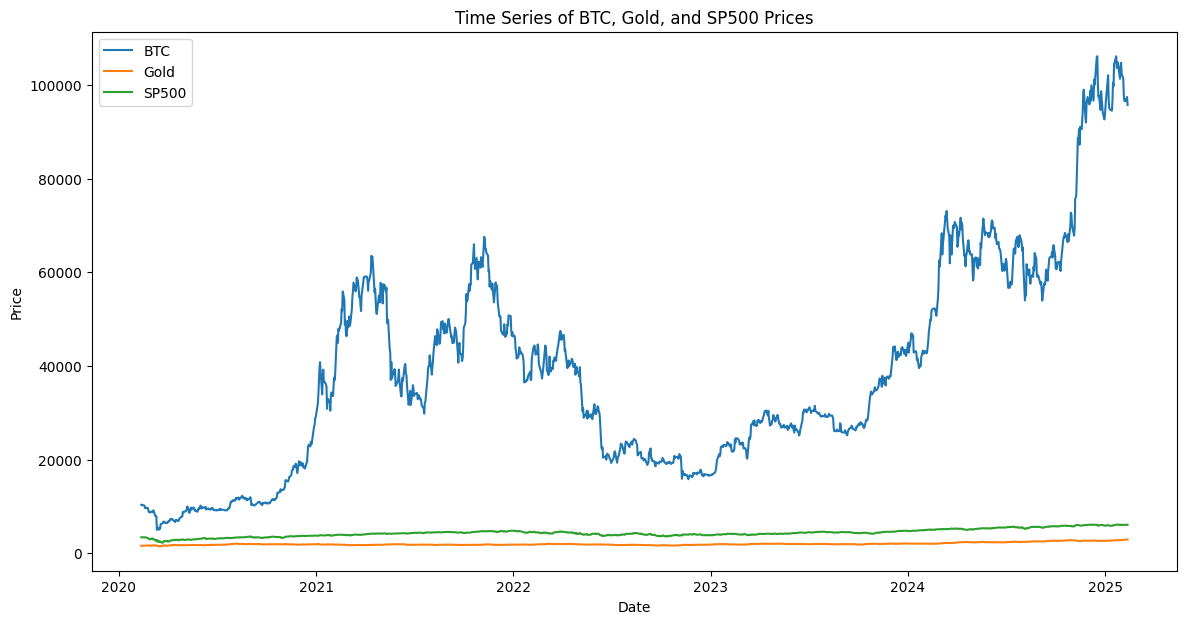

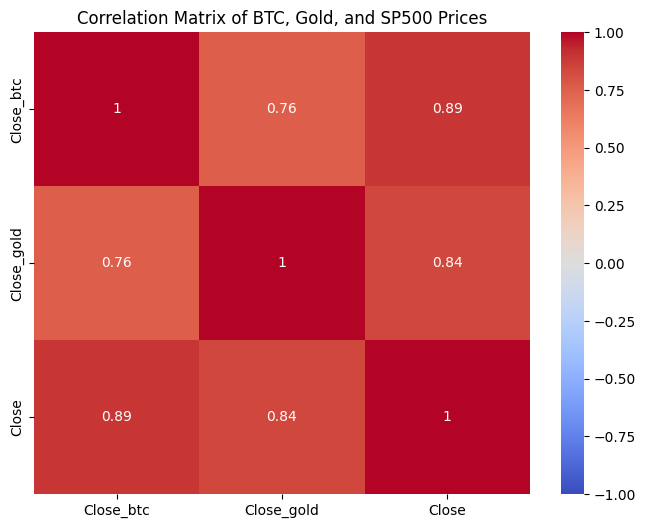

           Close_btc   Close_gold        Close
count    1257.000000  1257.000000  1257.000000
mean    38310.736086  1966.828239  4318.542141
std     22614.539007   286.092999   793.743583
min      4970.788086  1477.300049  2237.399902
25%     20381.650391  1784.900024  3854.429932
50%     34434.335938  1881.300049  4255.149902
75%     54529.144531  2010.099976  4688.669922
max    106146.265625  2914.300049  6118.709961


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the date column as the index
merged_df.set_index('Date', inplace=True)

# Plot the time series for BTC, Gold, and SP500
plt.figure(figsize=(14, 7))
plt.plot(merged_df.index, merged_df['Close_btc'], label='BTC')
plt.plot(merged_df.index, merged_df['Close_gold'], label='Gold')
plt.plot(merged_df.index, merged_df['Close'], label='SP500')
plt.title('Time Series of BTC, Gold, and SP500 Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate and plot the correlation matrix
correlation_matrix = merged_df[['Close_btc', 'Close_gold', 'Close']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of BTC, Gold, and SP500 Prices')
plt.show()

# Statistical analysis of the relationships between assets
print(merged_df[['Close_btc', 'Close_gold', 'Close']].describe())

# Feature Engineering
Create lag features, rolling statistics, technical indicators, and date-based features for the regression models.

In [18]:
import numpy as np

# Create lag features
for lag in range(1, 8):
    merged_df[f'Close_btc_lag_{lag}'] = merged_df['Close_btc'].shift(lag)
    merged_df[f'Close_gold_lag_{lag}'] = merged_df['Close_gold'].shift(lag)
    merged_df[f'Close_sp500_lag_{lag}'] = merged_df['Close'].shift(lag)

# Create rolling statistics features
for window in [7, 14, 30]:
    merged_df[f'Close_btc_roll_mean_{window}'] = merged_df['Close_btc'].rolling(window=window).mean()
    merged_df[f'Close_gold_roll_mean_{window}'] = merged_df['Close_gold'].rolling(window=window).mean()
    merged_df[f'Close_sp500_roll_mean_{window}'] = merged_df['Close'].rolling(window=window).mean()
    merged_df[f'Close_btc_roll_std_{window}'] = merged_df['Close_btc'].rolling(window=window).std()
    merged_df[f'Close_gold_roll_std_{window}'] = merged_df['Close_gold'].rolling(window=window).std()
    merged_df[f'Close_sp500_roll_std_{window}'] = merged_df['Close'].rolling(window=window).std()

# Create technical indicators (e.g., moving average convergence divergence (MACD))
merged_df['Close_btc_ema12'] = merged_df['Close_btc'].ewm(span=12, adjust=False).mean()
merged_df['Close_btc_ema26'] = merged_df['Close_btc'].ewm(span=26, adjust=False).mean()
merged_df['Close_btc_macd'] = merged_df['Close_btc_ema12'] - merged_df['Close_btc_ema26']

merged_df['Close_gold_ema12'] = merged_df['Close_gold'].ewm(span=12, adjust=False).mean()
merged_df['Close_gold_ema26'] = merged_df['Close_gold'].ewm(span=26, adjust=False).mean()
merged_df['Close_gold_macd'] = merged_df['Close_gold_ema12'] - merged_df['Close_gold_ema26']

merged_df['Close_sp500_ema12'] = merged_df['Close'].ewm(span=12, adjust=False).mean()
merged_df['Close_sp500_ema26'] = merged_df['Close'].ewm(span=26, adjust=False).mean()
merged_df['Close_sp500_macd'] = merged_df['Close_sp500_ema12'] - merged_df['Close_sp500_ema26']

# Create date-based features
merged_df['day_of_week'] = merged_df.index.dayofweek
merged_df['day_of_month'] = merged_df.index.day
merged_df['month'] = merged_df.index.month
merged_df['year'] = merged_df.index.year

# Drop rows with NaN values created by lag and rolling features
merged_df.dropna(inplace=True)

# Display the first few rows of the dataframe with new features
print(merged_df.head())

              Close_btc     High_btc      Low_btc     Open_btc   Volume_btc  \
Date                                                                          
2020-03-25  6681.062988  6892.511230  6536.926270  6738.716797  44590107888   
2020-03-26  6716.440430  6735.463867  6590.962891  6675.170898  35319797642   
2020-03-27  6469.798340  6793.836426  6466.701660  6719.389160  34585598367   
2020-03-30  6429.841797  6517.195801  5903.234375  5925.538574  37101651525   
2020-03-31  6438.644531  6504.515137  6374.162109  6430.606445  32786468812   

             Close_gold    High_gold     Low_gold    Open_gold  Volume_gold  \
Date                                                                          
2020-03-25  1632.300049  1676.500000  1631.099976  1676.500000          476   
2020-03-26  1650.099976  1660.500000  1650.099976  1660.500000            3   
2020-03-27  1623.900024  1623.900024  1623.900024  1623.900024       100638   
2020-03-30  1622.000000  1652.800049  1607.199951  

# Model Building
Implement three separate multiple linear regression models using sklearn, one for each asset price prediction.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and target for BTC
X_btc = merged_df.drop(columns=['Close_btc', 'Close_gold', 'Close'])
y_btc = merged_df['Close_btc']

# Split the data into training and testing sets for BTC
X_train_btc, X_test_btc, y_train_btc, y_test_btc = train_test_split(X_btc, y_btc, test_size=0.2, random_state=42)

# Create and train the model for BTC
model_btc = LinearRegression()
model_btc.fit(X_train_btc, y_train_btc)

# Make predictions for BTC
y_pred_btc = model_btc.predict(X_test_btc)

# Evaluate the model for BTC
mse_btc = mean_squared_error(y_test_btc, y_pred_btc)
r2_btc = r2_score(y_test_btc, y_pred_btc)
print(f'BTC Model - MSE: {mse_btc}, R2: {r2_btc}')

# Define the features and target for Gold
X_gold = merged_df.drop(columns=['Close_btc', 'Close_gold', 'Close'])
y_gold = merged_df['Close_gold']

# Split the data into training and testing sets for Gold
X_train_gold, X_test_gold, y_train_gold, y_test_gold = train_test_split(X_gold, y_gold, test_size=0.2, random_state=42)

# Create and train the model for Gold
model_gold = LinearRegression()
model_gold.fit(X_train_gold, y_train_gold)

# Make predictions for Gold
y_pred_gold = model_gold.predict(X_test_gold)

# Evaluate the model for Gold
mse_gold = mean_squared_error(y_test_gold, y_pred_gold)
r2_gold = r2_score(y_test_gold, y_pred_gold)
print(f'Gold Model - MSE: {mse_gold}, R2: {r2_gold}')

# Define the features and target for SP500
X_sp500 = merged_df.drop(columns=['Close_btc', 'Close_gold', 'Close'])
y_sp500 = merged_df['Close']

# Split the data into training and testing sets for SP500
X_train_sp500, X_test_sp500, y_train_sp500, y_test_sp500 = train_test_split(X_sp500, y_sp500, test_size=0.2, random_state=42)

# Create and train the model for SP500
model_sp500 = LinearRegression()
model_sp500.fit(X_train_sp500, y_train_sp500)

# Make predictions for SP500
y_pred_sp500 = model_sp500.predict(X_test_sp500)

# Evaluate the model for SP500
mse_sp500 = mean_squared_error(y_test_sp500, y_pred_sp500)
r2_sp500 = r2_score(y_test_sp500, y_pred_sp500)
print(f'SP500 Model - MSE: {mse_sp500}, R2: {r2_sp500}')

BTC Model - MSE: 1.3278123821878422e-10, R2: 1.0
Gold Model - MSE: 1.8319025414416938e-13, R2: 1.0
SP500 Model - MSE: 4.232515025505823e-11, R2: 0.9999999999999999


# Model Evaluation
Calculate R-squared, MSE, MAE for each model and perform cross-validation to assess model performance.

In [20]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

# Calculate Mean Absolute Error (MAE) for BTC
mae_btc = mean_absolute_error(y_test_btc, y_pred_btc)
print(f'BTC Model - MAE: {mae_btc}')

# Perform cross-validation for BTC model
cv_scores_btc = cross_val_score(model_btc, X_btc, y_btc, cv=5, scoring='r2')
print(f'BTC Model - Cross-Validation R2 Scores: {cv_scores_btc}')
print(f'BTC Model - Mean Cross-Validation R2 Score: {np.mean(cv_scores_btc)}')

# Calculate Mean Absolute Error (MAE) for Gold
mae_gold = mean_absolute_error(y_test_gold, y_pred_gold)
print(f'Gold Model - MAE: {mae_gold}')

# Perform cross-validation for Gold model
cv_scores_gold = cross_val_score(model_gold, X_gold, y_gold, cv=5, scoring='r2')
print(f'Gold Model - Cross-Validation R2 Scores: {cv_scores_gold}')
print(f'Gold Model - Mean Cross-Validation R2 Score: {np.mean(cv_scores_gold)}')

# Calculate Mean Absolute Error (MAE) for SP500
mae_sp500 = mean_absolute_error(y_test_sp500, y_pred_sp500)
print(f'SP500 Model - MAE: {mae_sp500}')

# Perform cross-validation for SP500 model
cv_scores_sp500 = cross_val_score(model_sp500, X_sp500, y_sp500, cv=5, scoring='r2')
print(f'SP500 Model - Cross-Validation R2 Scores: {cv_scores_sp500}')
print(f'SP500 Model - Mean Cross-Validation R2 Score: {np.mean(cv_scores_sp500)}')

BTC Model - MAE: 8.227159654099553e-06
BTC Model - Cross-Validation R2 Scores: [1. 1. 1. 1. 1.]
BTC Model - Mean Cross-Validation R2 Score: 1.0
Gold Model - MAE: 3.349630545690013e-07
Gold Model - Cross-Validation R2 Scores: [1. 1. 1. 1. 1.]
Gold Model - Mean Cross-Validation R2 Score: 0.999999999999998
SP500 Model - MAE: 4.2464077423795885e-06
SP500 Model - Cross-Validation R2 Scores: [1. 1. 1. 1. 1.]
SP500 Model - Mean Cross-Validation R2 Score: 0.9999999999999989


# Price Predictions
Generate and visualize predictions for all three assets using the trained models.

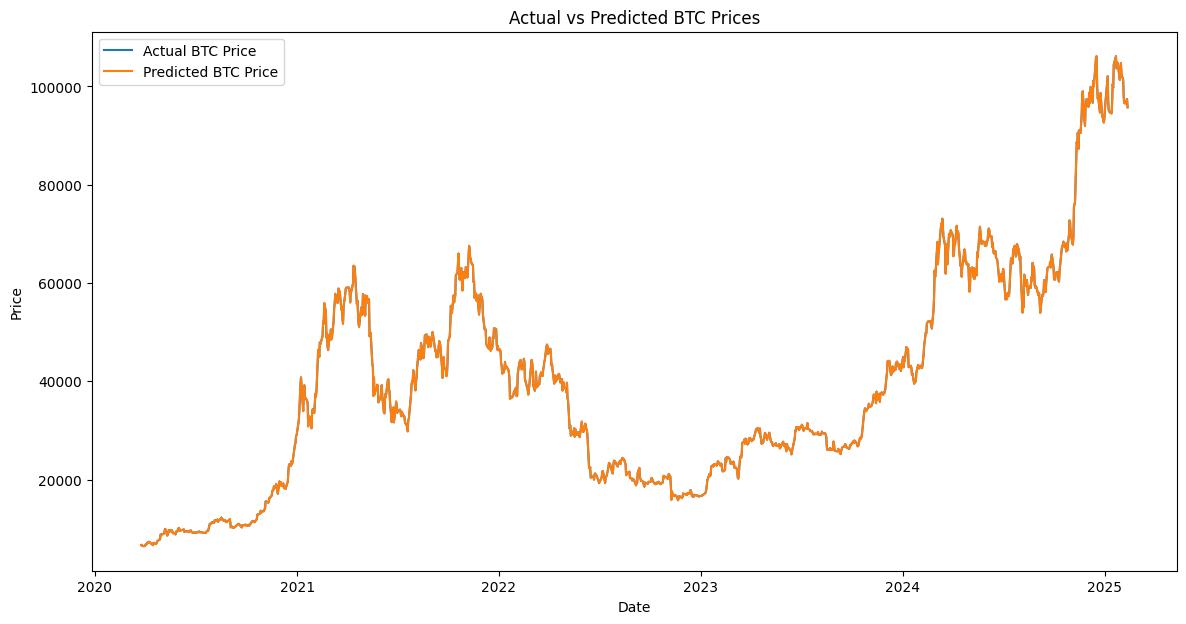

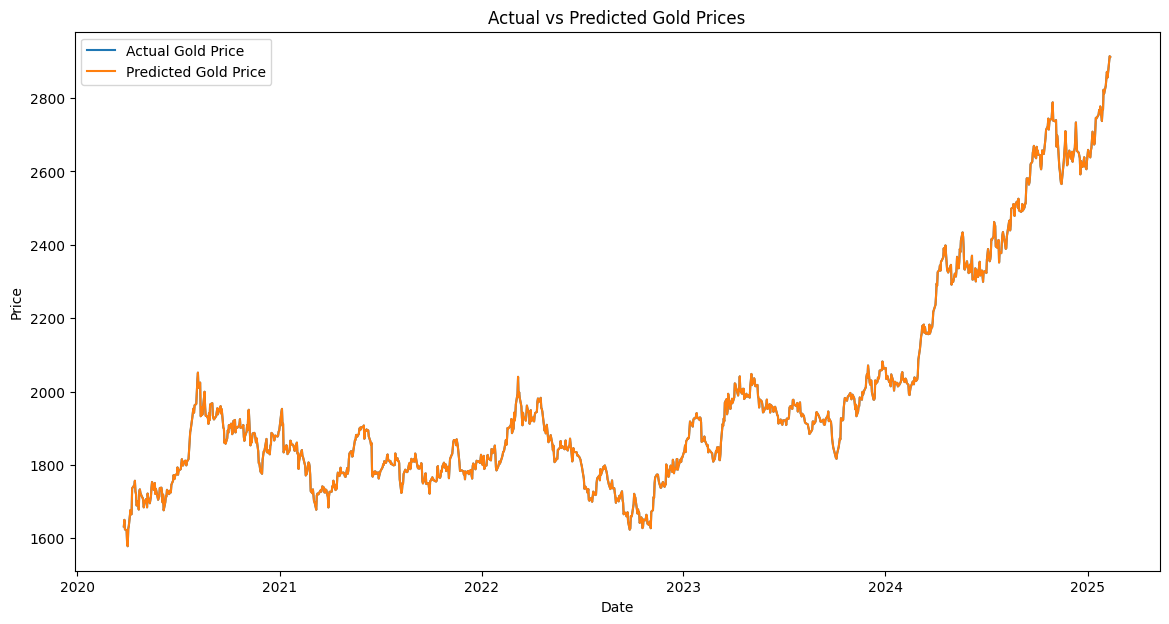

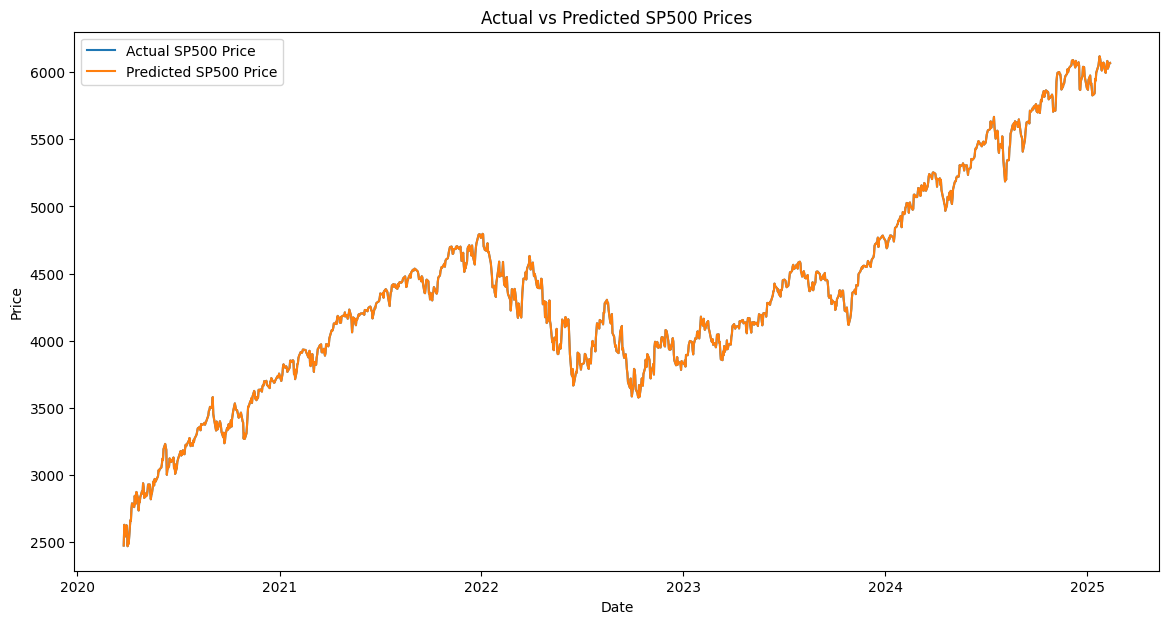

In [21]:
import matplotlib.pyplot as plt

# Generate predictions for the entire dataset
merged_df['Predicted_Close_btc'] = model_btc.predict(X_btc)
merged_df['Predicted_Close_gold'] = model_gold.predict(X_gold)
merged_df['Predicted_Close_sp500'] = model_sp500.predict(X_sp500)

# Plot the actual vs predicted prices for BTC
plt.figure(figsize=(14, 7))
plt.plot(merged_df.index, merged_df['Close_btc'], label='Actual BTC Price')
plt.plot(merged_df.index, merged_df['Predicted_Close_btc'], label='Predicted BTC Price')
plt.title('Actual vs Predicted BTC Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot the actual vs predicted prices for Gold
plt.figure(figsize=(14, 7))
plt.plot(merged_df.index, merged_df['Close_gold'], label='Actual Gold Price')
plt.plot(merged_df.index, merged_df['Predicted_Close_gold'], label='Predicted Gold Price')
plt.title('Actual vs Predicted Gold Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot the actual vs predicted prices for SP500
plt.figure(figsize=(14, 7))
plt.plot(merged_df.index, merged_df['Close'], label='Actual SP500 Price')
plt.plot(merged_df.index, merged_df['Predicted_Close_sp500'], label='Predicted SP500 Price')
plt.title('Actual vs Predicted SP500 Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

C:\Users\Jules\AppData\Local\Temp\ipykernel_9336\2487588352.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  future_df.fillna(0, inplace=True)


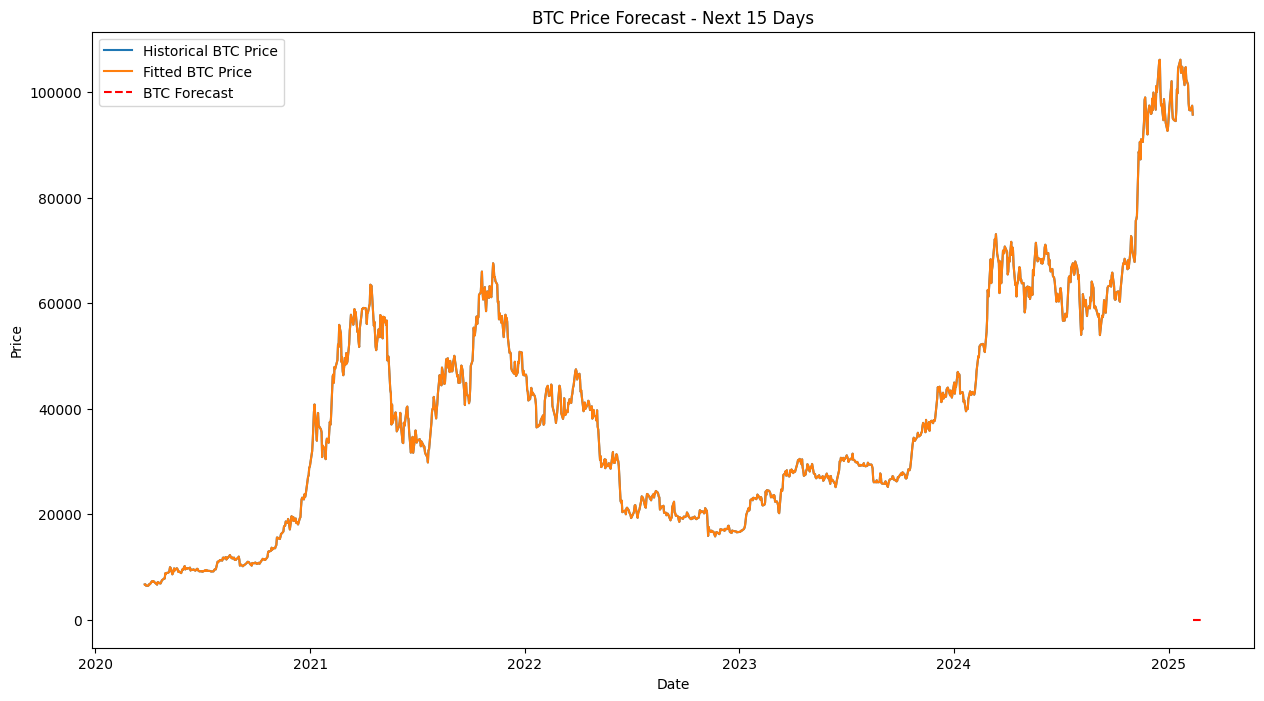

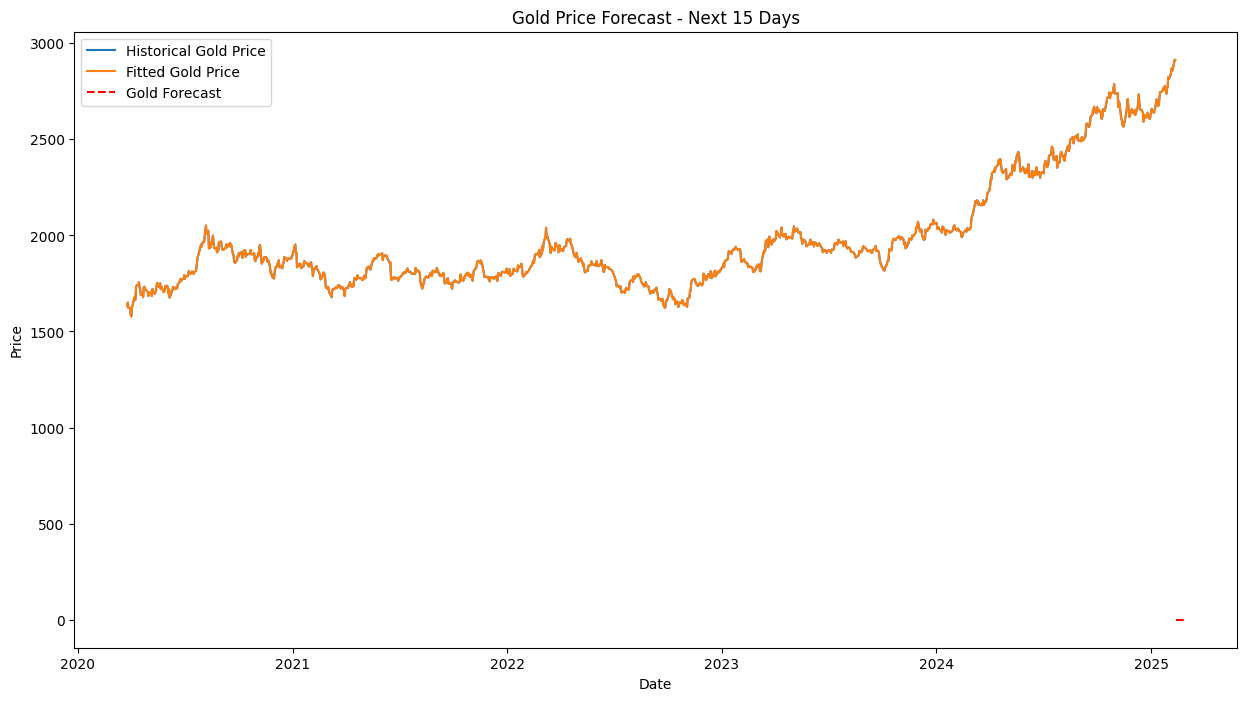

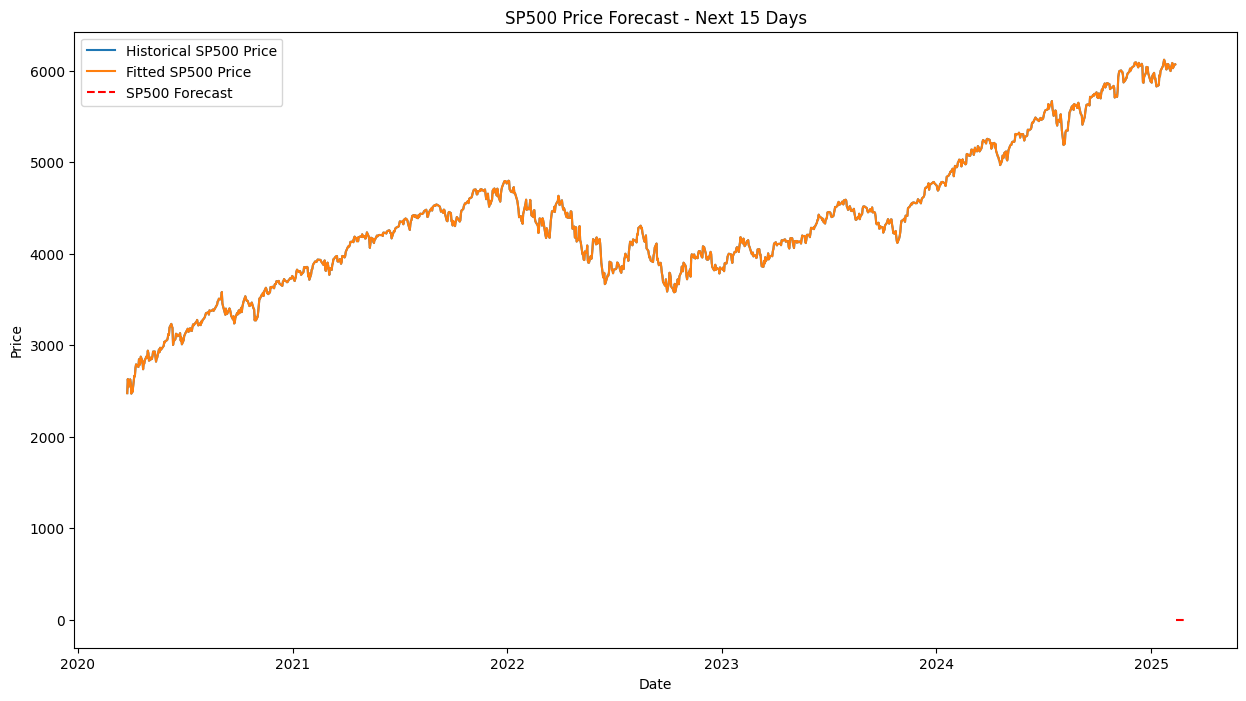


Forecasted values for the next 15 days:
         Date  BTC_Forecast  Gold_Forecast  SP500_Forecast
0  2025-02-12      0.000012   2.928926e-08       -0.000006
1  2025-02-13      0.000012   3.426034e-08       -0.000006
2  2025-02-14      0.000012   3.923142e-08       -0.000006
3  2025-02-15      0.000012   4.420250e-08       -0.000006
4  2025-02-16      0.000012   4.917358e-08       -0.000006
5  2025-02-17      0.000012   5.494164e-08       -0.000006
6  2025-02-18      0.000013   5.991272e-08       -0.000006
7  2025-02-19      0.000013   6.488380e-08       -0.000006
8  2025-02-20      0.000013   6.985488e-08       -0.000006
9  2025-02-21      0.000013   7.482596e-08       -0.000006
10 2025-02-22      0.000013   7.979704e-08       -0.000006
11 2025-02-23      0.000013   8.476812e-08       -0.000006
12 2025-02-24      0.000013   9.053618e-08       -0.000006
13 2025-02-25      0.000013   9.550726e-08       -0.000006
14 2025-02-26      0.000013   1.004783e-07       -0.000006


In [22]:
# Create a date range for future predictions
last_date = merged_df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=15, freq='D')

# Create a future dataframe with all features from X_btc
future_df = pd.DataFrame(index=future_dates, columns=X_btc.columns)

# Fill all values with 0 initially
future_df.fillna(0, inplace=True)

# Create date-based features
future_df['day_of_week'] = future_df.index.dayofweek
future_df['day_of_month'] = future_df.index.day
future_df['month'] = future_df.index.month
future_df['year'] = future_df.index.year

# Ensure column order matches X_btc
future_df = future_df[X_btc.columns]

# Make predictions for future dates
future_btc = model_btc.predict(future_df)
future_gold = model_gold.predict(future_df)
future_sp500 = model_sp500.predict(future_df)

# Plot predictions including future forecast
plt.figure(figsize=(15, 8))
plt.plot(merged_df.index, merged_df['Close_btc'], label='Historical BTC Price')
plt.plot(merged_df.index, merged_df['Predicted_Close_btc'], label='Fitted BTC Price')
plt.plot(future_dates, future_btc, 'r--', label='BTC Forecast')
plt.title('BTC Price Forecast - Next 15 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(15, 8))
plt.plot(merged_df.index, merged_df['Close_gold'], label='Historical Gold Price')
plt.plot(merged_df.index, merged_df['Predicted_Close_gold'], label='Fitted Gold Price')
plt.plot(future_dates, future_gold, 'r--', label='Gold Forecast')
plt.title('Gold Price Forecast - Next 15 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(15, 8))
plt.plot(merged_df.index, merged_df['Close'], label='Historical SP500 Price')
plt.plot(merged_df.index, merged_df['Predicted_Close_sp500'], label='Fitted SP500 Price')
plt.plot(future_dates, future_sp500, 'r--', label='SP500 Forecast')
plt.title('SP500 Price Forecast - Next 15 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Print the forecasted values
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'BTC_Forecast': future_btc,
    'Gold_Forecast': future_gold,
    'SP500_Forecast': future_sp500
})
print("\nForecasted values for the next 15 days:")
print(forecast_df)